In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


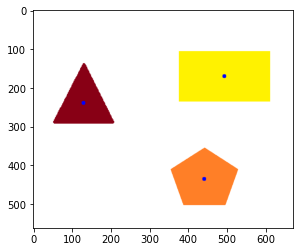

In [2]:
image = cv2.imread('images/shapes2.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.circle(image, (cx, cy), 5, (255,0,0), -1)

plt.imshow(image[...,::-1])

Sorted contor Areas
[30315.0, 17775.0, 12794.5]


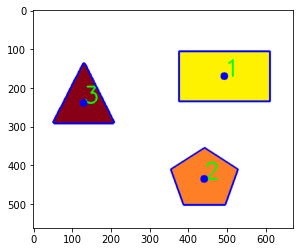

In [8]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas


image = cv2.imread('images/shapes2.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)
    cv2.circle(image, (cx, cy), 10, (255,0,0), -1)

plt.imshow(image[...,::-1])

Sorted contor Areas
[11060.0, 3408.5, 3133.5, 1491.5, 337.5]


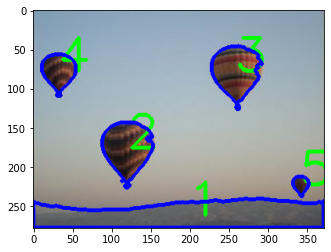

In [7]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
input_image = cv2.imread('images/balloon.png')

# convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)


# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(input_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(input_image, [c], -1, (255,0,0), 3)
    cv2.circle(image, (cx, cy), 10, (255,255,255), -1)

plt.imshow(input_image[...,::-1])